In [ ]:
# Librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns

# Carga de datos
from google.colab import drive
drive.mount("/content/drive")
file_path = "/content/drive/MyDrive/TP 1 - ORGANIZACIÓN DE DATOS/googleplaystore.csv"
google_play_data = pd.read_csv(file_path).drop(10472) #elimino fila 10472, ya que tiene una categoria no existente ('1.9')
reviews_file_path = "/content/drive/MyDrive/TP 1 - ORGANIZACIÓN DE DATOS/googleplaystore_user_reviews.csv"
user_reviews_data = pd.read_csv(reviews_file_path)

# Para tener una tematica de colores parecida al google store, voy a setear unos colores para usar durante todo el proyecto
google_store_colors = ['FF3333', 'FFD400', '3BCCFF', '48FF48']


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(0.0, 6.0)

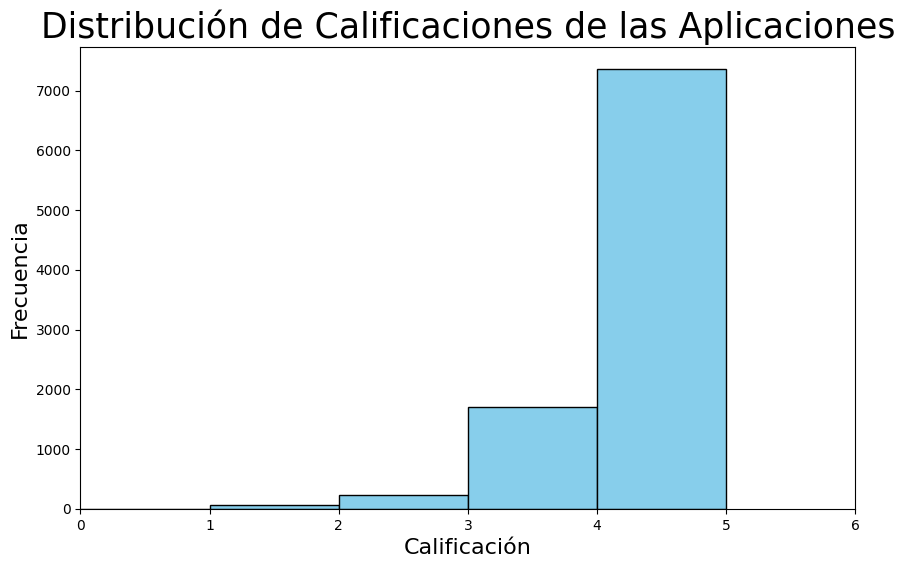

In [ ]:
#Histograma (Rating)
#Voy a mostrar como se distribuyen las califaciones de todas las aplicaciones , tomando rangos de 1 en 1 (0-1, 1-2, 2-3 ,etc)

rating_histogram = google_play_data['Rating'].plot.hist(figsize=(10,6), bins=[0, 1, 2, 3, 4, 5] ,color='skyblue', edgecolor='black')

#Seteos de titulos y nombre de ejes
rating_histogram.set_title('Distribución de Calificaciones de las Aplicaciones', fontsize=25)
rating_histogram.set_xlabel('Calificación', fontsize=16)
rating_histogram.set_ylabel('Frecuencia', fontsize=16)

#Ajuste de ejes
rating_histogram.set_xlim(0,6)

#NOTA: Los bins y el xlim los setie después de una primera visualización, creo que de esta forma se consigue una mejor legibilidad



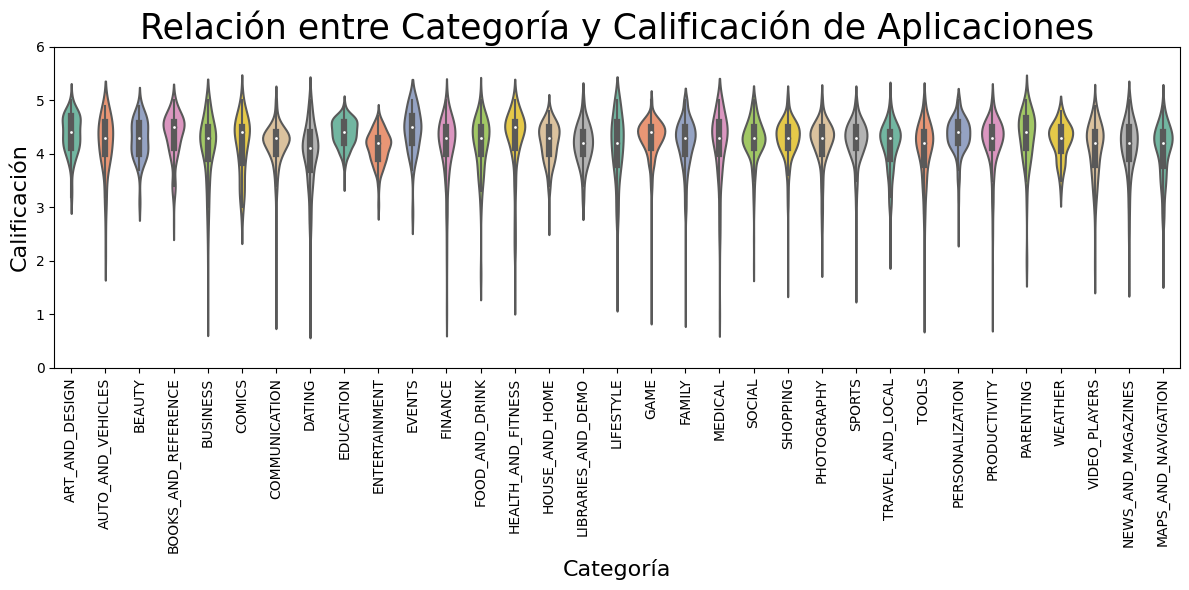

In [ ]:
#Violin Plot (Category vs. Rating):
#Voy a mostrar la distribucion de las calificaciones en diferentes categorias de aplicaciones

plt.figure(figsize=(12, 6))
cat_vs_rat_violinplot = sns.violinplot(x='Category', y='Rating', data=google_play_data, palette='Set2')

#Seteos de titulos y nombre de ejes
cat_vs_rat_violinplot.set_title('Relación entre Categoría y Calificación de Aplicaciones', fontsize=25)
cat_vs_rat_violinplot.set_xlabel('Categoría', fontsize=16)
cat_vs_rat_violinplot.set_ylabel('Calificación', fontsize=16)

#Ajuste de ejes
cat_vs_rat_violinplot.set_ylim(0, 6)
plt.xticks(rotation=90) #rota los nobmre de categorias
plt.tight_layout()



Text(0.5, 1.0, 'Heatmap de Calificaciones Promedio por Categoría y Tipo')

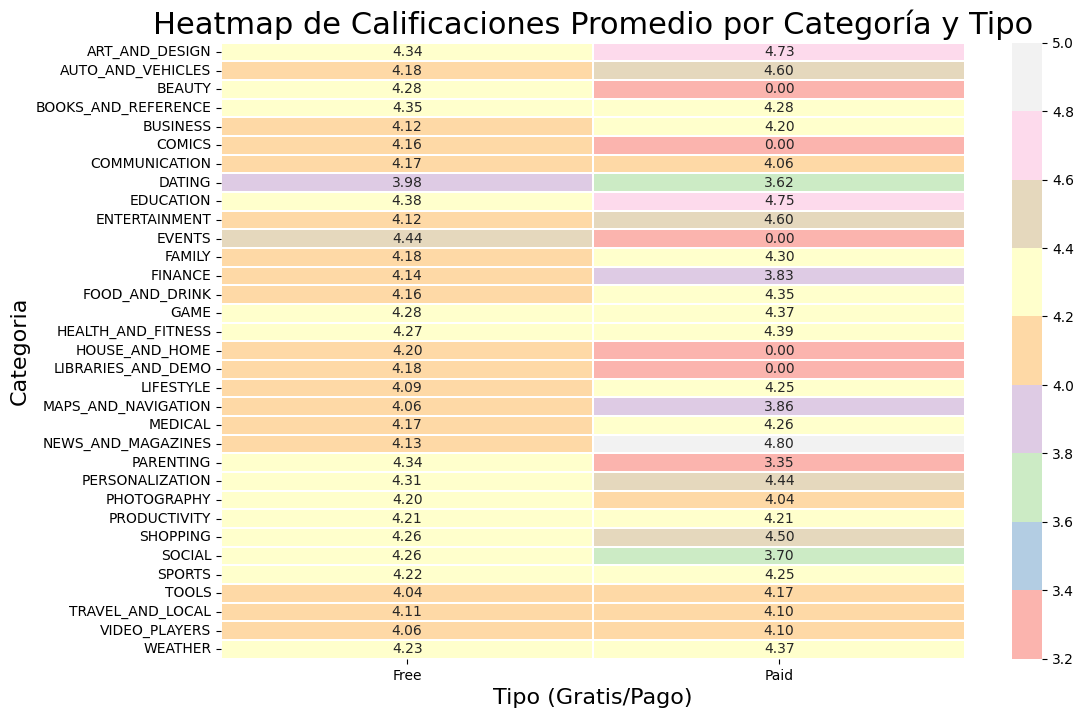

In [ ]:
#Heatmap (Calificaciones promedio por categoria y tipo)
#Voy a mostrar como varian las calificaciones promedio de las categorias en cada tipo (pago y gratis)

# Calculo el promedio de calificaciones por categoria y genero una tabla pivot
category_rating_avg = google_play_data.groupby('Category')['Rating'].mean().reset_index()
table = pd.pivot_table(google_play_data, values='Rating', index='Category', columns='Type', aggfunc='mean', fill_value=0)


# Encuentro el valor minimo y maximo de promedios distinto de 0 (ya que son valores nan). Esto me va a servir para ajustar el rango para los colores
min_value = table['Paid'][table['Paid'] != 0].min()
max_value = table['Paid'][table['Paid'] != 0].max()


# Crear el heatmap con escala personalizada de 3.2 a 5 (probando vi que quedaban de una forma entendible las diferencias entre los valores)
plt.figure(figsize=(12, 8))
avgrat_cat_type_heatmap = sns.heatmap(table, cmap='Pastel1', annot=True, fmt='.2f', linewidths=0.1, vmin=3.2, vmax=5)

#Seteos de titulos y nombre de ejes
avgrat_cat_type_heatmap.set_xlabel('Tipo (Gratis/Pago)', fontsize=16)
avgrat_cat_type_heatmap.set_ylabel('Categoria', fontsize=16)
avgrat_cat_type_heatmap.set_title('Heatmap de Calificaciones Promedio por Categoría y Tipo', fontsize=22)





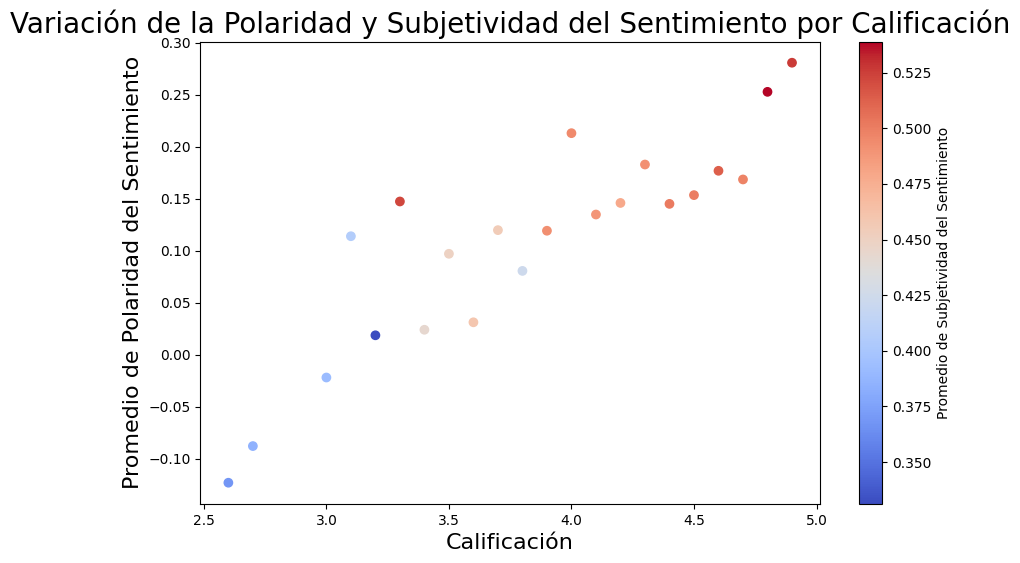

In [ ]:
#Scatter plot (Variación de la Polaridad y Subjetividad del Sentimiento por Calificación)
#Voy a mostrar cómo varían los promedios de la polaridad del sentimiento y la subjetividad del sentimiento en función de la calificación de las aplicaciones

# Merge con la columna App de ambos dataframes
merged_df = pd.merge(google_play_data, user_reviews_data, on='App')

# Filtro solo las filas con valores numéricos para "Rating", "Sentiment_Polarity" y "Sentiment_Subjectivity"
merged_df = merged_df.dropna(subset=['Rating', 'Sentiment_Polarity', 'Sentiment_Subjectivity'])

# Calculo del promedio de "Sentiment_Polarity" y "Sentiment_Subjectivity" por calificación
avg_sentiment_polarity = merged_df.groupby('Rating')['Sentiment_Polarity'].mean()
avg_sentiment_subjectivity = merged_df.groupby('Rating')['Sentiment_Subjectivity'].mean()

# Crear el gráfico de dispersión con los promedios
plt.figure(figsize=(10, 6))
scatter_avg_pop_sub_rat = plt.scatter(avg_sentiment_polarity.index, avg_sentiment_polarity, c=avg_sentiment_subjectivity, cmap='coolwarm', alpha=1)

#Seteos de titulos y nombre de ejes
plt.xlabel('Calificación', fontsize=16)
plt.ylabel('Promedio de Polaridad del Sentimiento', fontsize=16)
plt.title('Variación de la Polaridad y Subjetividad del Sentimiento por Calificación', fontsize=20)
plt.colorbar(label='Promedio de Subjetividad del Sentimiento')





Text(0.1, 0.9, 'Correlación: 0.85')

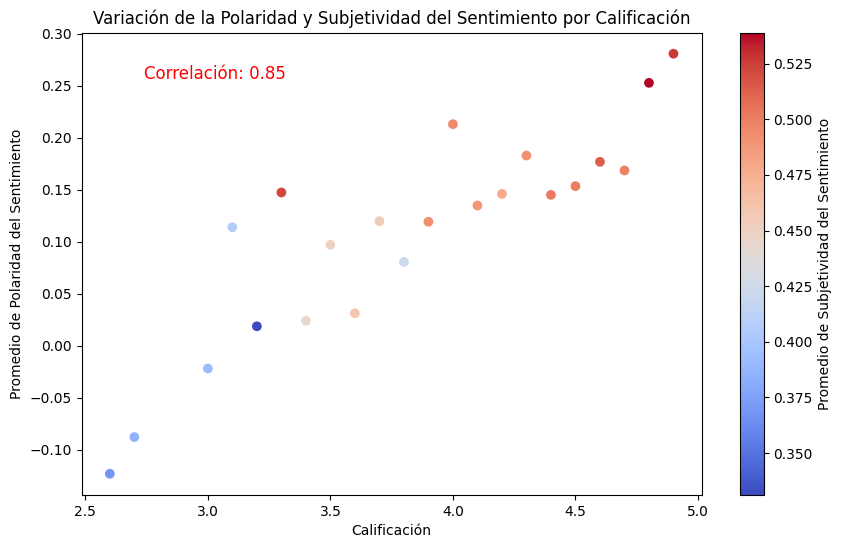

In [ ]:
#Extra: al ver lo lineal que se ve a la vista(comparando entre 2 variables y cualquiera de esas 3), voy a ver cuanto me da la correlacion

# Calcular la correlación entre las variables de Popularidad
correlation = avg_sentiment_polarity.corr(avg_sentiment_subjectivity)

# Crear el gráfico de dispersión con los promedios
plt.figure(figsize=(10, 6))
scatter_avg_pop_sub_rat = plt.scatter(avg_sentiment_polarity.index, avg_sentiment_polarity, c=avg_sentiment_subjectivity, cmap='coolwarm', alpha=1)

# Seteos de titulos y nombre de ejes
plt.xlabel('Calificación')
plt.ylabel('Promedio de Polaridad del Sentimiento')
plt.title('Variación de la Polaridad y Subjetividad del Sentimiento por Calificación')
plt.colorbar(label='Promedio de Subjetividad del Sentimiento')

# Mostrar la correlación en el gráfico
plt.text(0.1, 0.9, f'Correlación: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12, color='red')

